# Testing scientific software

* basic tutorial
* `pytest`
* test-driven development
* github automation
* bonus: property-based testing

### https://github.com/StanczakDominik/plasma-hack-week-testing-session

# Why test software?

* Writing tests takes time
* But debugging your code takes more time

# Chandrasekhar G function


$$G(x) \equiv \frac{\phi(x) / x^2 - \phi'(x) / x}{2}$$

$\phi(x)$ being the error function.

# First attempt

In [1]:
!git checkout main

Already on 'main'
Your branch is up to date with 'origin/main'.


In [2]:
!git checkout 06c63e6

Note: switching to '06c63e6'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 06c63e6 Initial implementation of Chandrasekhar G function


# Naive implementation

In [3]:
# %load Chandrasekhar.py
from scipy.special import erf
import numpy as np


def G(x):
    erf_derivative = 2 * np.exp(-(x ** 2)) / np.sqrt(np.pi)
    return (erf(x) / x ** 2 - erf_derivative / x) / 2


In [4]:
G(1)

0.21379664776456

In [5]:
G(2)

0.11924853678884607

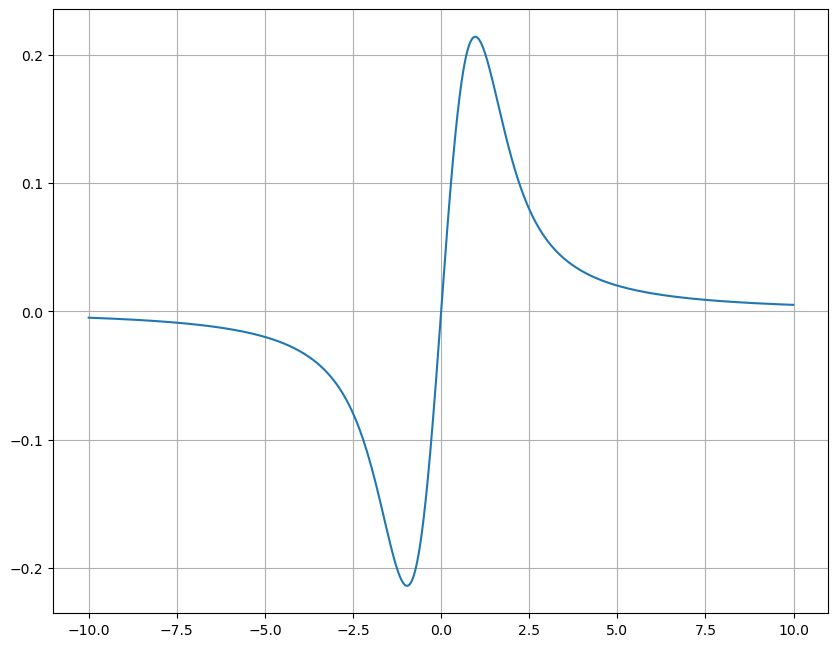

In [6]:
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.01)
y = G(x)
plt.plot(x, y)
plt.grid()

# First test

In [7]:
!git checkout 2067e67

Previous HEAD position was 06c63e6 Initial implementation of Chandrasekhar G function
HEAD is now at 2067e67 Add simple test for G -> 0 as x -> oo, 0


In [8]:
!cat Chandrasekhar.py

from scipy.special import erf
import numpy as np


def G(x):
    erf_derivative = 2 * np.exp(-(x ** 2)) / np.sqrt(np.pi)
    return (erf(x) / x ** 2 - erf_derivative / x) / 2


In [9]:
!cat test_Chandrasekhar.py

from Chandrasekhar import G
import numpy as np


def test_known_values_Chandrasekhar_G():
    large_x = 1e30
    assert np.isclose(G(large_x), 0)

    small_x = 1e-16
    assert np.isclose(G(small_x), 0)


In [10]:
!pytest

============================= test session starts ==============================
platform linux -- Python 3.9.5, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.4.2
Freetype: 2.10.4
benchmark: 3.4.1 (defaults: timer=time.perf_counter disable_gc=False min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: /home/dominik/Chandrasekhar
plugins: regressions-2.2.0, anyio-3.1.0, xonsh-0.9.27, mpl-0.12, enabler-1.2.0, hypothesis-6.14.0, benchmark-3.4.1, datadir-1.3.1, xdist-2.3.0, Faker-8.8.2, forked-1.3.0, flake8-1.0.7, black-0.3.12, localserver-0.5.0, cov-2.12.1, pudb-0.7.0, arraydiff-0.3
collected 1 item                                                               

test_Chandrasekhar.py .                                                  [100%]

============================== 1 passed in 0.69s ===============================


# Another test! $ x = 0$?

In [11]:
!git checkout ff1132b
!git show ff1132b

Previous HEAD position was 2067e67 Add simple test for G -> 0 as x -> oo, 0
HEAD is now at ff1132b Add test at zero, exactly
commit ff1132b7ed23134bf76e954e6e457c3828224e12 (HEAD)
Author: Dominik Stańczak <stanczakdominik@gmail.com>
Date:   Thu Jul 1 20:03:28 2021 +0200

    Add test at zero, exactly

diff --git a/test_Chandrasekhar.py b/test_Chandrasekhar.py
index fdc736f..43bdf24 100644
--- a/test_Chandrasekhar.py
+++ b/test_Chandrasekhar.py
@@ -8,3 +8,5 @@ def test_known_values_Chandrasekhar_G():
 
     small_x = 1e-16
     assert np.isclose(G(small_x), 0)
+
+    assert np.isclose(G(0), 0)


In [12]:
!pytest

============================= test session starts ==============================
platform linux -- Python 3.9.5, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.4.2
Freetype: 2.10.4
benchmark: 3.4.1 (defaults: timer=time.perf_counter disable_gc=False min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: /home/dominik/Chandrasekhar
plugins: regressions-2.2.0, anyio-3.1.0, xonsh-0.9.27, mpl-0.12, enabler-1.2.0, hypothesis-6.14.0, benchmark-3.4.1, datadir-1.3.1, xdist-2.3.0, Faker-8.8.2, forked-1.3.0, flake8-1.0.7, black-0.3.12, localserver-0.5.0, cov-2.12.1, pudb-0.7.0, arraydiff-0.3
collected 1 item                                                               

test_Chandrasekhar.py F                                                  [100%]

=================================== FAILURES ===================================
______________________ test_known_values_Chandrasekhar_G _______________________

    def test_known

In [13]:
!git checkout 9f37b1a
!cat Chandrasekhar.py

Previous HEAD position was ff1132b Add test at zero, exactly
HEAD is now at 9f37b1a Add special case for x = 0
from scipy.special import erf
import numpy as np


def G(x):
    if np.isclose(x, 0):
        return 0
    erf_derivative = 2 * np.exp(-(x ** 2)) / np.sqrt(np.pi)
    return (erf(x) / x ** 2 - erf_derivative / x) / 2


In [14]:
!pytest

============================= test session starts ==============================
platform linux -- Python 3.9.5, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.4.2
Freetype: 2.10.4
benchmark: 3.4.1 (defaults: timer=time.perf_counter disable_gc=False min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: /home/dominik/Chandrasekhar
plugins: regressions-2.2.0, anyio-3.1.0, xonsh-0.9.27, mpl-0.12, enabler-1.2.0, hypothesis-6.14.0, benchmark-3.4.1, datadir-1.3.1, xdist-2.3.0, Faker-8.8.2, forked-1.3.0, flake8-1.0.7, black-0.3.12, localserver-0.5.0, cov-2.12.1, pudb-0.7.0, arraydiff-0.3
collected 1 item                                                               

test_Chandrasekhar.py .                                                  [100%]

============================== 1 passed in 0.57s ===============================


# Passing an array

In [15]:
!git checkout b9c8a8f
!cat test_Chandrasekhar.py

Previous HEAD position was 9f37b1a Add special case for x = 0
HEAD is now at b9c8a8f Add test for numpy array input
from Chandrasekhar import G
import numpy as np


def test_known_values_Chandrasekhar_G():
    large_x = 1e30
    assert np.isclose(G(large_x), 0)

    small_x = 1e-16
    assert np.isclose(G(small_x), 0)

    assert np.isclose(G(0), 0)

def test_known_values_as_numpy_array_Chandrasekhar_G():
    x = np.array([1e30, 1e-16, 0])
    assert np.allclose(G(x), 0)


In [16]:
!pytest

============================= test session starts ==============================
platform linux -- Python 3.9.5, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.4.2
Freetype: 2.10.4
benchmark: 3.4.1 (defaults: timer=time.perf_counter disable_gc=False min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: /home/dominik/Chandrasekhar
plugins: regressions-2.2.0, anyio-3.1.0, xonsh-0.9.27, mpl-0.12, enabler-1.2.0, hypothesis-6.14.0, benchmark-3.4.1, datadir-1.3.1, xdist-2.3.0, Faker-8.8.2, forked-1.3.0, flake8-1.0.7, black-0.3.12, localserver-0.5.0, cov-2.12.1, pudb-0.7.0, arraydiff-0.3
collected 2 items                                                              

test_Chandrasekhar.py .F                                                 [100%]

=================================== FAILURES ===================================
_______________ test_known_values_as_numpy_array_Chandrasekhar_G _______________

    def test_known

# Rewrite for array input

In [17]:
!git checkout e8e031f
!cat Chandrasekhar.py

Previous HEAD position was b9c8a8f Add test for numpy array input
HEAD is now at e8e031f Adapt code to take numpy arrays as well
from scipy.special import erf
import numpy as np


def G(x):
    x = np.asarray(x)
    erf_derivative = 2 * np.exp(-x**2) / np.sqrt(np.pi)
    output = (erf(x) / x **2 - erf_derivative / x) / 2
    output = np.where(x == 0, 0, output)
    return output


In [18]:
!pytest

============================= test session starts ==============================
platform linux -- Python 3.9.5, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.4.2
Freetype: 2.10.4
benchmark: 3.4.1 (defaults: timer=time.perf_counter disable_gc=False min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: /home/dominik/Chandrasekhar
plugins: regressions-2.2.0, anyio-3.1.0, xonsh-0.9.27, mpl-0.12, enabler-1.2.0, hypothesis-6.14.0, benchmark-3.4.1, datadir-1.3.1, xdist-2.3.0, Faker-8.8.2, forked-1.3.0, flake8-1.0.7, black-0.3.12, localserver-0.5.0, cov-2.12.1, pudb-0.7.0, arraydiff-0.3
collected 2 items                                                              

test_Chandrasekhar.py ..                                                 [100%]

=============================== warnings summary ===============================
test_Chandrasekhar.py::test_known_values_Chandrasekhar_G
  /home/dominik/Chandrasekhar/Chandrasekhar

# We could check output types...

In [19]:
!git checkout 643000b
!git show 643000b

Previous HEAD position was e8e031f Adapt code to take numpy arrays as well
HEAD is now at 643000b Add some basic tests for input/output types
commit 643000b0628eb209d26066cf2f388a023641d2ac (HEAD)
Author: Dominik Stańczak <stanczakdominik@gmail.com>
Date:   Thu Jul 1 20:11:54 2021 +0200

    Add some basic tests for input/output types

diff --git a/test_Chandrasekhar.py b/test_Chandrasekhar.py
index 81da7de..be8a11d 100644
--- a/test_Chandrasekhar.py
+++ b/test_Chandrasekhar.py
@@ -8,9 +8,13 @@ def test_known_values_Chandrasekhar_G():
 
     small_x = 1e-16
     assert np.isclose(G(small_x), 0)
+    assert isinstance(G(small_x), float)
 
     assert np.isclose(G(0), 0)
+    assert isinstance(G(0), float)
 
 def test_known_values_as_numpy_array_Chandrasekhar_G():
     x = np.array([1e30, 1e-16, 0])
     assert np.allclose(G(x), 0)
+    assert isinstance(G(x), np.ndarray)
+    assert G(x).size == 3


In [20]:
!pytest

============================= test session starts ==============================
platform linux -- Python 3.9.5, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.4.2
Freetype: 2.10.4
benchmark: 3.4.1 (defaults: timer=time.perf_counter disable_gc=False min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: /home/dominik/Chandrasekhar
plugins: regressions-2.2.0, anyio-3.1.0, xonsh-0.9.27, mpl-0.12, enabler-1.2.0, hypothesis-6.14.0, benchmark-3.4.1, datadir-1.3.1, xdist-2.3.0, Faker-8.8.2, forked-1.3.0, flake8-1.0.7, black-0.3.12, localserver-0.5.0, cov-2.12.1, pudb-0.7.0, arraydiff-0.3
collected 2 items                                                              

test_Chandrasekhar.py F.                                                 [100%]

=================================== FAILURES ===================================
______________________ test_known_values_Chandrasekhar_G _______________________

    def test_known

# We had the types wrong! Time to adjust the tests

In [21]:
!git checkout 5e7e9bf
!git show 5e7e9bf

Previous HEAD position was 643000b Add some basic tests for input/output types
HEAD is now at 5e7e9bf Correct values of output types in tests
commit 5e7e9bf58d27a99b645c881c64d5ea2748aaaadd (HEAD)
Author: Dominik Stańczak <stanczakdominik@gmail.com>
Date:   Thu Jul 1 20:16:27 2021 +0200

    Correct values of output types in tests

diff --git a/test_Chandrasekhar.py b/test_Chandrasekhar.py
index be8a11d..e7f830b 100644
--- a/test_Chandrasekhar.py
+++ b/test_Chandrasekhar.py
@@ -8,10 +8,10 @@ def test_known_values_Chandrasekhar_G():
 
     small_x = 1e-16
     assert np.isclose(G(small_x), 0)
-    assert isinstance(G(small_x), float)
+    assert isinstance(G(small_x), np.ndarray)
 
     assert np.isclose(G(0), 0)
-    assert isinstance(G(0), float)
+    assert isinstance(G(0), np.ndarray)
 
 def test_known_values_as_numpy_array_Chandrasekhar_G():
     x = np.array([1e30, 1e-16, 0])


In [22]:
!pytest

============================= test session starts ==============================
platform linux -- Python 3.9.5, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.4.2
Freetype: 2.10.4
benchmark: 3.4.1 (defaults: timer=time.perf_counter disable_gc=False min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: /home/dominik/Chandrasekhar
plugins: regressions-2.2.0, anyio-3.1.0, xonsh-0.9.27, mpl-0.12, enabler-1.2.0, hypothesis-6.14.0, benchmark-3.4.1, datadir-1.3.1, xdist-2.3.0, Faker-8.8.2, forked-1.3.0, flake8-1.0.7, black-0.3.12, localserver-0.5.0, cov-2.12.1, pudb-0.7.0, arraydiff-0.3
collected 2 items                                                              

test_Chandrasekhar.py ..                                                 [100%]

=============================== warnings summary ===============================
test_Chandrasekhar.py::test_known_values_Chandrasekhar_G
  /home/dominik/Chandrasekhar/Chandrasekhar

# What about all the warnings?

In [23]:
!git checkout e63895c
!git show @ 

Previous HEAD position was 5e7e9bf Correct values of output types in tests
HEAD is now at e63895c Add np.errstate block to ignore warnings
commit e63895cbfd8e0f3a92cec006bf69f5ad344bf26c (HEAD)
Author: Dominik Stańczak <stanczakdominik@gmail.com>
Date:   Thu Jul 1 20:13:29 2021 +0200

    Add np.errstate block to ignore warnings

diff --git a/Chandrasekhar.py b/Chandrasekhar.py
index daa31ae..7098864 100644
--- a/Chandrasekhar.py
+++ b/Chandrasekhar.py
@@ -4,7 +4,8 @@ import numpy as np
 
 def G(x):
     x = np.asarray(x)
-    erf_derivative = 2 * np.exp(-x**2) / np.sqrt(np.pi)
-    output = (erf(x) / x **2 - erf_derivative / x) / 2
+    with np.errstate(divide='ignore', invalid='ignore'):
+        erf_derivative = 2 * np.exp(-x**2) / np.sqrt(np.pi)
+        output = (erf(x) / x **2 - erf_derivative / x) / 2
     output = np.where(x == 0, 0, output)
     return output


In [24]:
!pytest

============================= test session starts ==============================
platform linux -- Python 3.9.5, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.4.2
Freetype: 2.10.4
benchmark: 3.4.1 (defaults: timer=time.perf_counter disable_gc=False min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: /home/dominik/Chandrasekhar
plugins: regressions-2.2.0, anyio-3.1.0, xonsh-0.9.27, mpl-0.12, enabler-1.2.0, hypothesis-6.14.0, benchmark-3.4.1, datadir-1.3.1, xdist-2.3.0, Faker-8.8.2, forked-1.3.0, flake8-1.0.7, black-0.3.12, localserver-0.5.0, cov-2.12.1, pudb-0.7.0, arraydiff-0.3
collected 2 items                                                              

test_Chandrasekhar.py ..                                                 [100%]

============================== 2 passed in 0.45s ===============================


# A very simple regression test

don't actually do it like this!

* `pytest-arraydiff`: https://pypi.org/project/pytest-arraydiff/
* `pytest-regressions`: https://pypi.org/project/pytest-regressions/

In [25]:
!git checkout 18ae85d
!tail -n 25 test_Chandrasekhar.py

Previous HEAD position was e63895c Add np.errstate block to ignore warnings
HEAD is now at 18ae85d Add simple regression test

def test_regression_G():
    x = np.linspace(-5, 5, 15)
    y = G(x)
    stored_values = np.array(
        [
            -0.02,
            -0.02722222,
            -0.03919953,
            -0.06119047,
            -0.10595478,
            -0.18306813,
            -0.19961233,
            0.0,
            0.19961233,
            0.18306813,
            0.10595478,
            0.06119047,
            0.03919953,
            0.02722222,
            0.02,
        ]
    )

    assert_allclose(y, stored_values)


In [26]:
!pytest

============================= test session starts ==============================
platform linux -- Python 3.9.5, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.4.2
Freetype: 2.10.4
benchmark: 3.4.1 (defaults: timer=time.perf_counter disable_gc=False min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: /home/dominik/Chandrasekhar
plugins: regressions-2.2.0, anyio-3.1.0, xonsh-0.9.27, mpl-0.12, enabler-1.2.0, hypothesis-6.14.0, benchmark-3.4.1, datadir-1.3.1, xdist-2.3.0, Faker-8.8.2, forked-1.3.0, flake8-1.0.7, black-0.3.12, localserver-0.5.0, cov-2.12.1, pudb-0.7.0, arraydiff-0.3
collected 3 items                                                              

test_Chandrasekhar.py ...                                                [100%]

============================== 3 passed in 0.61s ===============================


# GitHub automation...

In [27]:
!git log --oneline

18ae85d (HEAD, origin/main, main) Add simple regression test
e63895c Add np.errstate block to ignore warnings
5e7e9bf Correct values of output types in tests
643000b Add some basic tests for input/output types
e8e031f Adapt code to take numpy arrays as well
b9c8a8f Add test for numpy array input
9f37b1a Add special case for x = 0
ff1132b Add test at zero, exactly
2067e67 Add simple test for G -> 0 as x -> oo, 0
06c63e6 Initial implementation of Chandrasekhar G function
a73019d Add initial testing files


In [28]:
!cat .github/workflows/testing.yml

name: CI

on:
  push:
    branches:
      - main
  pull_request:

jobs:
  tests:
    name: Pytest
    runs-on: ubuntu-latest
    steps:
    - name: Checkout code
      uses: actions/checkout@v2.3.4
    - name: Set up Python
      uses: actions/setup-python@v2.2.2
      with:
        python-version: 3.9
    - name: Install Python dependencies
      run: python -m pip install pytest scipy numpy
    - name: Run tests
      run: pytest


## All of our commits were being tested on GitHub:

### https://github.com/StanczakDominik/plasma-hack-week-testing-session/actions

## Pull requests tests

### https://github.com/StanczakDominik/plasma-hack-week-testing-session/pull/1

## Bonus: property-based testing

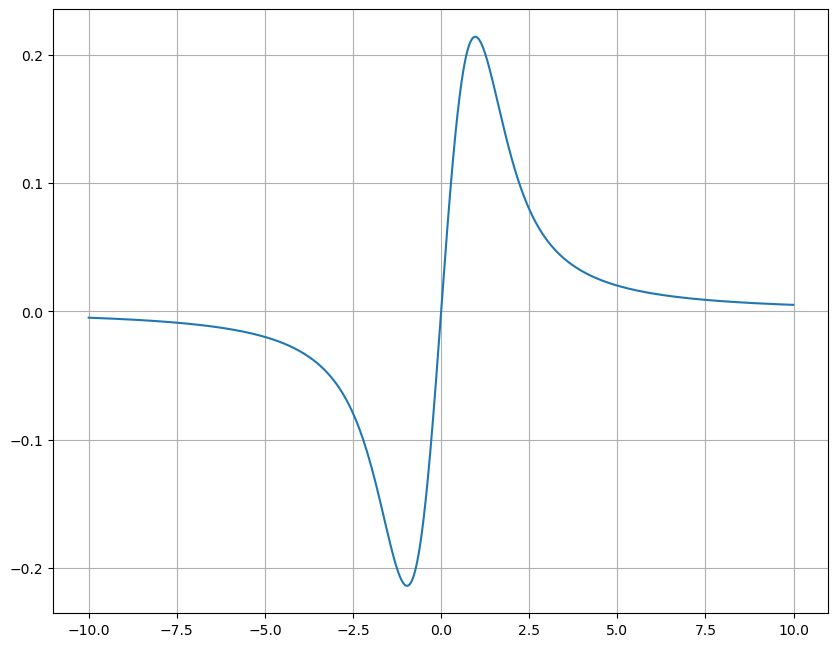

In [29]:
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.01)
y = G(x)
plt.plot(x, y)
plt.grid()

In [30]:
!git checkout hypothesis
!git show @ test_Chandrasekhar.py

Previous HEAD position was 18ae85d Add simple regression test
Switched to branch 'hypothesis'
Your branch is up to date with 'origin/hypothesis'.
commit 630f8d7dbd067783cac82b572ef1a627a50bda22 (HEAD -> hypothesis, origin/hypothesis)
Author: Dominik Stańczak <stanczakdominik@gmail.com>
Date:   Thu Jul 1 20:40:18 2021 +0200

    Add basic property based test

diff --git a/test_Chandrasekhar.py b/test_Chandrasekhar.py
index ea9a21b..89bc449 100644
--- a/test_Chandrasekhar.py
+++ b/test_Chandrasekhar.py
@@ -1,6 +1,7 @@
 from Chandrasekhar import G
 import numpy as np
 from numpy.testing import assert_allclose
+from hypothesis import given, strategies as st
 
 
 def test_known_values_Chandrasekhar_G():
@@ -46,3 +47,11 @@ def test_regression_G():
     )
 
     assert_allclose(y, stored_values)
+
+
+@given(
+    x=st.floats(),
+)
+def test_properties_G(x):
+    result = G(x)
+    assert np.isfinite(result)


In [ ]:
!pytest